## Introduction to Seaborn: statistical data visualization
<table><border=0><tr><td><img src="http://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/errorband_lineplots_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/scatterplot_sizes_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/timeseries_facets_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/horizontal_boxplot_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/regression_marginals_thumb.png" width="100"></td></tr></table>
    
Notebook adapted from Wendy Lee 2024


[Seaborn_API_reference](http://seaborn.pydata.org/api.html)
    
In today's class. we will learn how to create meaningful visualization that helps summarize the large amount of data effectively. We are introducing two libraries; matplotlib and seaborn.

It's common to use `sns` as an alias for seaborn. We will also use the `pyplot` module from the `matplotlib` package, and we will use `plt` as the alias.

In [1]:
### Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
### The input file is tab-delimited
tsv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# we can specify the delimiter by using the sep keyword argument
euk = pd.read_csv(tsv_Filepath, sep='\t')

euk.head(3)

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847,71219,2010,Chromosome


In [ ]:
euk.tail3)

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome
8301,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.820700,38.2536,-,-,2018,Chromosome


In [3]:
euk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   object 
 1   Kingdom             8302 non-null   object 
 2   Class               8302 non-null   object 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 8302 non-null   object 
 5   Number of genes     8302 non-null   object 
 6   Number of proteins  8302 non-null   object 
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 583.9+ KB


### Clean the data
Notice that the fields `Species`, `Kingdom`, `Class`, and `Assembly status` all contain strings, and some of the numeric fields contains "-" instead of a number. Replace the "-" in the numeric field with NaN value. We do this when we read in the tsv file.

In [7]:
### User dictionary that will be used to cast dtypes
my_types={
"Species":"string",
"Kingdom":"string",
"Class":"string",
"Assembly status":"string"
}

# We will change the object to string for the fields that contain strings and
# we will change "-" into na
euk=pd.read_csv(tsv_Filepath, sep="\t", dtype=my_types, na_values=["-"])
euk.tail(5)

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2000,NaN,NaN,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155.0,298.0,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,NaN,NaN,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,NaN,NaN,2018,Chromosome
8301,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.820700,38.2536,NaN,NaN,2018,Chromosome


In [8]:
euk.dtypes

,0
Species,string[python]
Kingdom,string[python]
Class,string[python]
Size (Mb),float64
GC%,float64
Number of genes,float64
Number of proteins,float64
Publication year,int64
Assembly status,string[python]


## Visualizing relationship between two variables

Now, let's face the truth. We are not very good at seeing patterns by reading large tables of data. For example, look at the following table that contains the genome size and the number of genes for reptiles. Can you see the relationship between genome size and the number of genes?

In [13]:
## Filter for class and remove outliers
selected = euk
selected=selected[(euk.Class=="Reptiles") & (euk["Number of proteins"]>1000)]
selected[["Species","Size (Mb)","Number of genes"]]

,Species,Size (Mb),Number of genes
282,Anolis carolinensis,1799.14,22092.0
565,Pogona vitticeps,1716.68,21445.0
944,Chrysemys picta bellii,2365.77,25289.0
1122,Chelonia mydas,2208.41,22336.0
1136,Alligator mississippiensis,2161.73,25012.0
1150,Crocodylus porosus,2049.54,19551.0
1218,Notechis scutatus,1665.53,22413.0
1248,Pelodiscus sinensis,2202.48,24516.0
1376,Thamnophis sirtalis,1424.90,20101.0
1513,Python bivittatus,1435.05,21877.0


This is a small dataset, and it's already quite challenging to spot the relationship. Let's try to view this data by creating a scatter plot using seaborn.  

We will use a magic function `%matplotlib inline`, which is special Juypter command, to render and display the plot in Juypter notebook.


In [10]:
%matplotlib inline

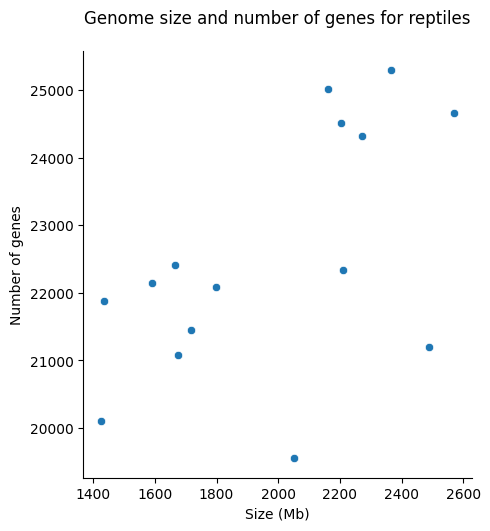

In [16]:
sns.relplot(data=selected, x="Size (Mb)", y="Number of genes")
plt.title("Genome size and number of genes for reptiles", pad=20); # put a semicolon to omit the stdout text of the plot

It only takes a glance to see the positive correlation. In this lecture we will use visualization to make sense of our data.

## `relplot` - Relationship plot
We pass the dataframe into the [`relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html) function, and the names of the columns that we want on the `X` and `Y` axes. Let's look at the relationship between genome size and number of genes in the entire eukaryote genome dataset:

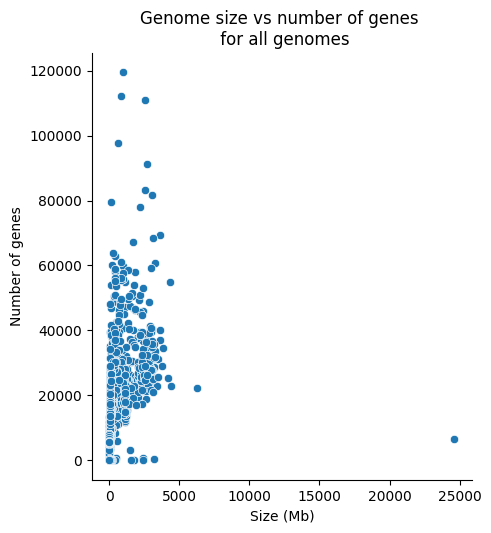

In [17]:
sns.relplot(data=euk, x="Size (Mb)", y="Number of genes")
plt.title("Genome size vs number of genes \n for all genomes");

The chart above shows a problem commonly encountered in real life data: there is a single outlier with a massive genome size, which compresses the rest of the data points over to the left and makes it difficult to see the patterns.

We could fix this by manually setting the x axis limits, but it’s probably easier to use pandas to filter the dataframe and exclude very large genomes:

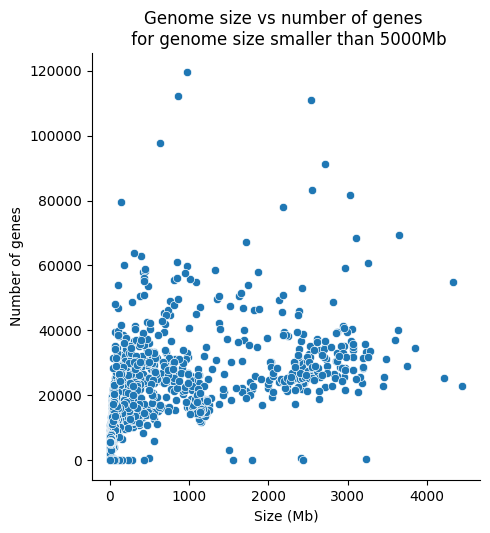

In [18]:
# Excluding the outlier
sns.relplot(
    data=euk[euk["Size (Mb)"] < 5000],
    x="Size (Mb)",
    y="Number of genes"
)
plt.title("Genome size vs number of genes \n for genome size smaller than 5000Mb");

Rather than giving `relplot` a collection of X and Y values to plot, instead we give it the
whole dataframe and then specify which columns we want to determine the X and Y positions of each point.

The benefits of this way of thinking about plots become clear when we start mapping other properties. By setting the `hue` argument we can specify which column we want to determine the color of each point. Here’s another plot of genome size versus number of genes, this time limited to animals and with the GC percentage represented by hue. It’s best to remove any rows with missing data before plotting our data so that it won't impact seaborn's ability to choose the color scales for the `hue`. We wil use Panda's [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) to do that.

**DNA has 4 building blocks**
`A`, `T`, `C`, and `G`

DNA_seq = "ATCCGTAGTATACGGATCGTAGATTATACGGACGAGTCGACTGACTGACT"

CG% is the proportion of the DNA sequence containing Cs and Gs. Based on CG% of the DNA, we can tell, whether we are looking at the DNA of a particular organism.

In [19]:
animals=(
    euk[(euk["Kingdom"]=="Animals")].dropna()
)

animals

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
34,Caenorhabditis briggsae,Animals,Roundworms,108.3840,37.6966,22736.0,21959.0,2002,Chromosome
35,Caenorhabditis elegans,Animals,Roundworms,100.2860,35.4317,46857.0,28420.0,2001,Complete Genome
36,Brugia malayi,Animals,Roundworms,93.6591,31.4990,11441.0,11472.0,2002,Scaffold
37,Aedes aegypti,Animals,Insects,1278.7300,38.1667,19339.0,28317.0,2017,Chromosome
38,Aedes albopictus,Animals,Insects,2247.3100,40.3999,38274.0,42912.0,2016,Contig
...,...,...,...,...,...,...,...,...,...
5642,Fasciola hepatica,Animals,Flatworms,1138.3300,44.3000,14854.0,14642.0,2017,Scaffold
5738,Pan troglodytes,Animals,Mammals,32.7991,41.0000,21.0,20.0,2004,Chromosome
5779,Scleropages formosus,Animals,Fishes,708.4030,43.2000,24736.0,24274.0,2015,Scaffold
5797,Trichinella pseudospiralis,Animals,Roundworms,48.1069,32.6000,13685.0,17126.0,2015,Scaffold


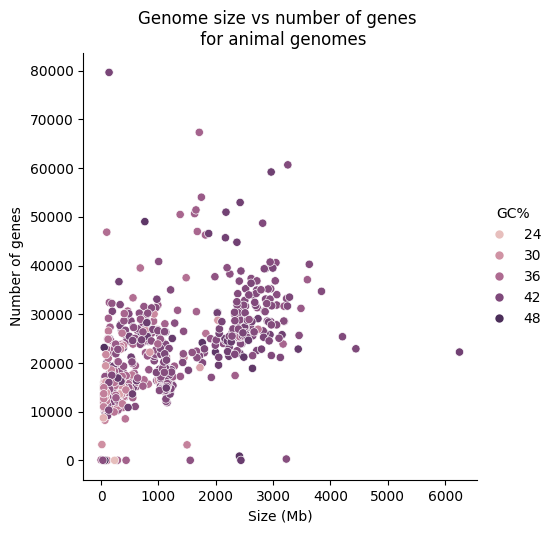

In [20]:
sns.relplot(
    data=animals,
    x="Size (Mb)",
    y="Number of genes",
    hue="GC%"
)
plt.title("Genome size vs number of genes \n for animal genomes");

You can choose different palette for using different colors by setting the `palette` argument in relplot. [seaborn_color_palettes](http://seaborn.pydata.org/tutorial/color_palettes.html)

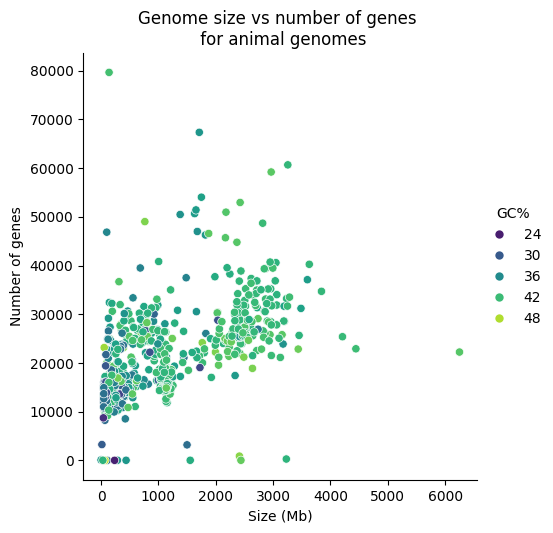

In [ ]:
sns.relplot(
    data=animals,
    x="Size (Mb)",
    y="Number of genes",
    hue="GC%",
    palette="viridis"
)
plt.title("Genome size vs number of genes \n for animal genomes");

If we pick our mapping carefully, this lets us see multiple relationships between variables in a single plot. Unsurprisingly, larger genomes have more genes, and tend to have more moderate GC percentages - all the extremes of GC percentage (i.e. very light or dark colors) are over to the left of the chart.

Another property that we can map is the size of the data points. Let’s plot number of genes versus number of proteins and have the *size* of each point determined by the size of the genome. We use `size` argument to map the size of the dot to the size of the genome. The argument `sizes` determines the minimum and maximum sizes of the points we want on the plot.

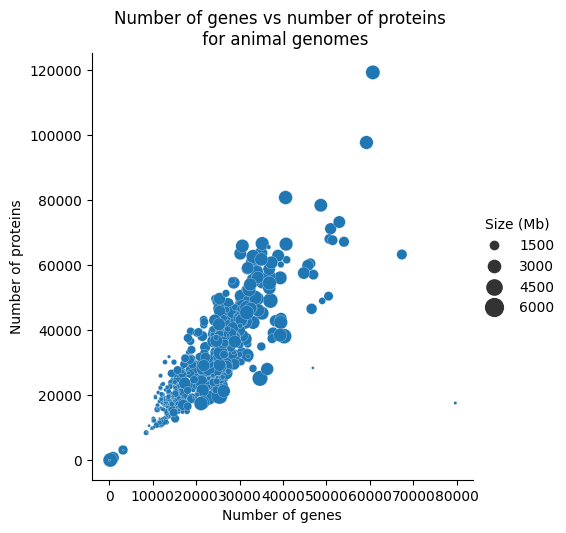

In [23]:
sns.relplot(
    data=animals,
    x="Number of genes",
    y="Number of proteins",
    size="Size (Mb)",
    sizes=(1, 200)
)

plt.title("Number of genes vs number of proteins \n for animal genomes");

Let's use `size` to keep track of the genome size and `hue` to keep track of the publication year together.

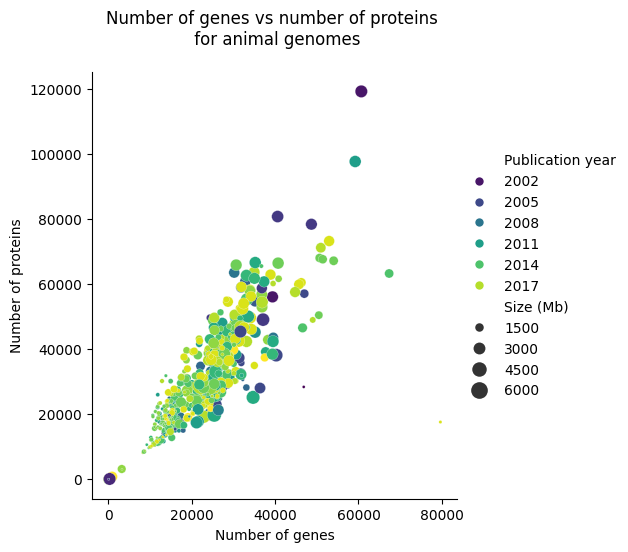

In [ ]:
sns.relplot(
    data=animals,
    x="Number of genes",
    y="Number of proteins",
    size="Size (Mb)",
    sizes=(2, 150),
    hue="Publication year",
    palette="viridis"
)
plt.title("Number of genes vs number of proteins \n for animal genomes", pad=20);

As the more details we try to fit onto a chart the harder it is to interpret. The relative
importance of the different point properties is determined by the way that our vision works. Research has shown that we find it easiest to see patterns in the position of the points (X and Y), followed by the size and finally the hue, so take this into account when deciding which variables to map to which properties.

Remember that the starting point for all of these plots is a pandas dataframe, so we still have access to all the pandas tools that we saw previously. To plot something like gene density, which is not part of the original file, we just need to add it as a new column first:

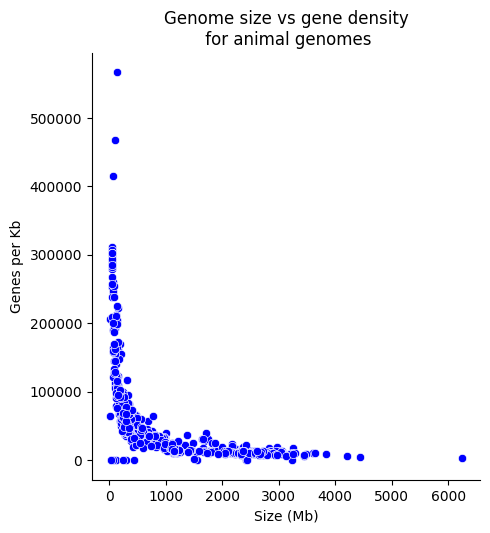

In [ ]:
# Create gene density column
animals["Genes per Kb"] = animals["Number of genes"]/animals["Size (Mb)"]*1000
sns.relplot(
    data=animals,
    x="Size (Mb)",
    y="Genes per Kb",
    color="blue",
)
plt.title("Genome size vs gene density\n for animal genomes");

We know from our previous plots that there’s a strong positive correlation between genome size and number of genes, but this plot tells us that the pattern is reversed for gene density. Large genomes may contain more genes, but the genes are spaced farther apart!

Although this result isn’t particularly surprising, it’s reassuring to see it in
such a clear figure.

## Special types of scatter plots

In this section, we will learn how to plot large number of data points. We will use a dataset that contains genome sequence assembly data.


<table border=0><tr>
<td colspan=2><img src="https://rheonix.com/wp-content/uploads/2018/10/Updated-NGS-Workflow-web.png" width=700></td></tr>
<tr><td><img src="https://contig.files.wordpress.com/2010/02/alignment.jpg" width=400></td><td>
<img src="https://slideplayer.com/slide/12967081/79/images/6/Sequence+assembly+Reads+Contigs+Scaffolds+6.jpg" width=300></td></tr></table>

In [24]:
# This dataset has no missing data
contigs_filepath="https://raw.githubusercontent.com/csbfx/advpy122-data/master/contigs.csv"

con = pd.read_csv(contigs_filepath)
con.head()

,name,length,GC,coverage,phylum
0,scaffold1_size1534183,1534183,0.4304,0.603315,Bacteroidetes
1,scaffold2_size1255804,1255804,0.4237,1.266944,Bacteroidetes
2,scaffold3_size1208507,1208507,0.5007,0.364660,Armatimonadetes
3,scaffold4_size1204010,1204010,0.4281,0.499764,Bacteroidetes
4,scaffold5_size1189196,1189196,0.4942,0.320681,Proteobacteria


In [25]:
# How many rows are in this dataset?
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22497 entries, 0 to 22496
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      22497 non-null  object 
 1   length    22497 non-null  int64  
 2   GC        22497 non-null  float64
 3   coverage  22497 non-null  float64
 4   phylum    22497 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 878.9+ KB


Let’s try to visualize the relationship between `GC` (GC content) and `length` (note that for this dataset the GC is measured as a content, between 0 and 1).

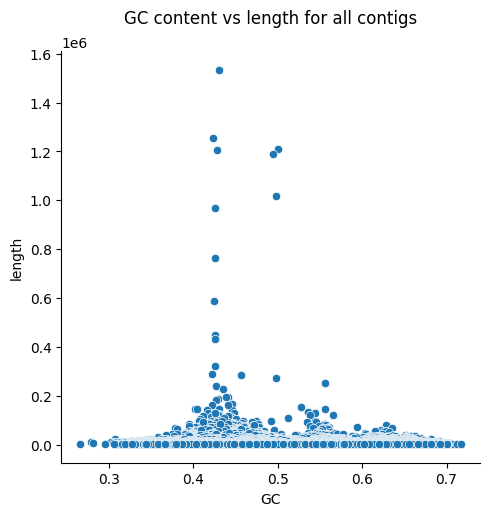

In [26]:
g = sns.relplot(data=con, x="GC", y="length")
plt.title("GC content vs length for all contigs", pad=20); #pad=20, allow a bit more space for a two-line title

Let's get rid some of the outliers (small numbers of very large contigs). Just as we did before, we
can use pandas to filter these out in order to better see the distribution of the rest of the data.

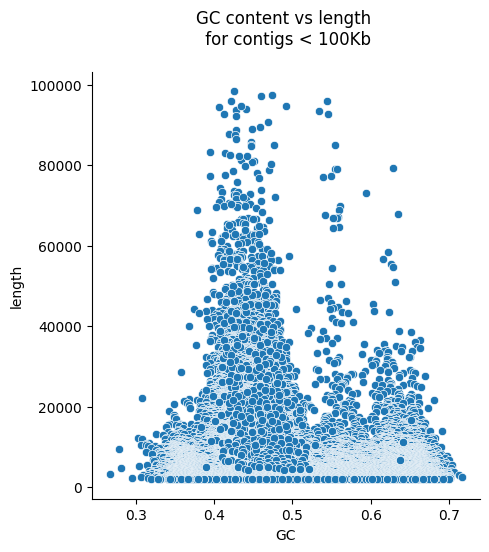

In [27]:
sns.relplot(
    data=con[con.length < 100000],
    x="GC",
    y="length"
)
plt.title("GC content vs length \n for contigs < 100Kb",pad=20);

There is clearly some structure in this plot, but the sheer number of points being plotted make it hard to see. There are simply too many points on top of each other.

There are a few ways to cope with this. One option is to set the points to be transparent using the `alpha` argument. Setting `alpha = 0.01` makes the each point on the plot 99% transparent and turns the circles into a fuzzy cloud, and makes it possible to discern some structure that we couldn’t see before.

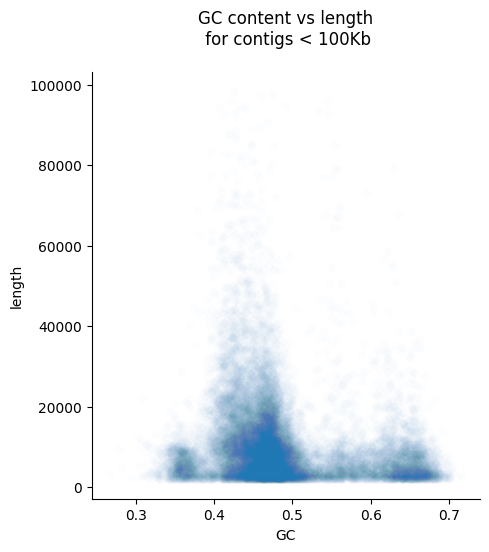

In [28]:
sns.relplot(
    data=con[con.length < 100000],
    x="GC",
    y="length",
    alpha=0.01
)
plt.title("GC content vs length\n for contigs < 100Kb", pad=20);

It certainly looks like there are several populations of contigs with different ranges of GC and length.

A similar idea is to shrink the points, which we can do by setting the `s` parameter (`s` is short for size - remember from earlier that the size parameter is used when we want the size of points to vary). We will also have to remove the border around each point by setting its line width to zero:

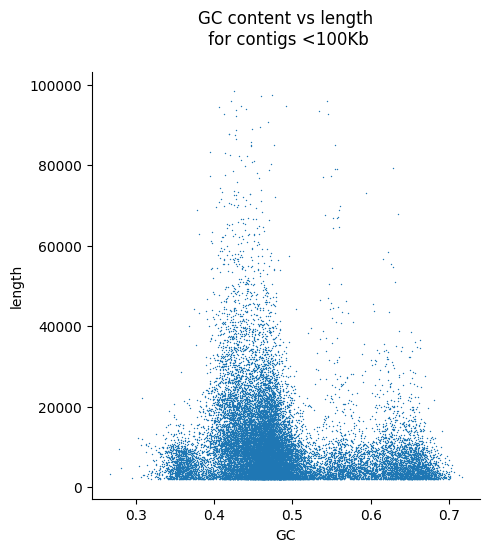

In [29]:
sns.relplot(
    data=con[con.length < 100000],
    x="GC",
    y="length",
    s=1,
    linewidth=0
)
plt.title("GC content vs length\n for contigs <100Kb", pad=20);

Another option when we have too many points is to plot just a random subset of the dataset. There’s no option to do that in seaborn, but luckily it is easy using pandas:

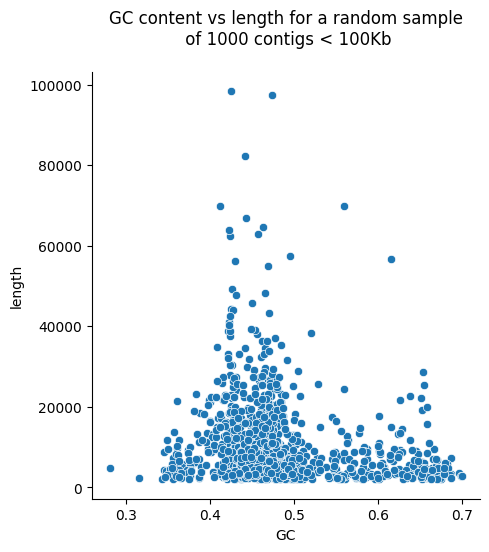

In [30]:
sns.relplot(
    data=con[con.length < 100000].sample(1000),
    x="GC",
    y="length"
)
plt.title(
    "GC content vs length for a random sample\n of 1000 contigs < 100Kb", pad=20
);

These first three approaches still use scatter plots, where individual data points are drawn. To get away from this,
we could imagine dividing up the area of the chart into different regions and shading them based on the number of
points in the area. This gives us a slightly more exotic type of chart - a *hexbin*. We can draw one in seaborn using`jointplot` with the `kind=hex` argument:

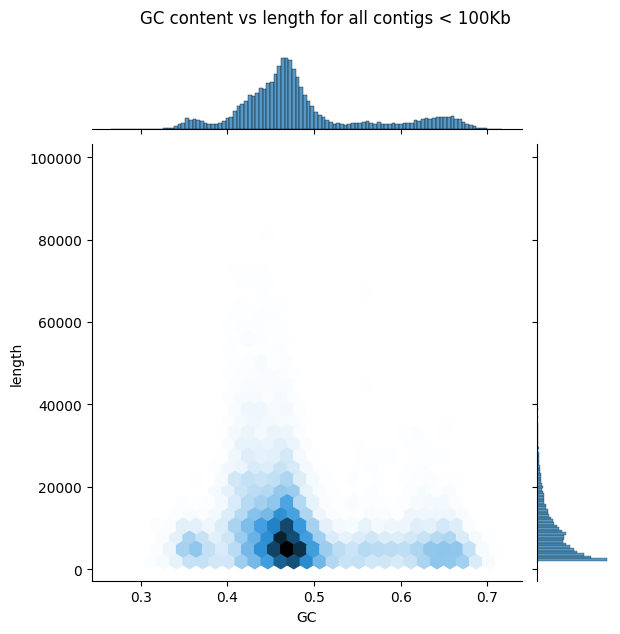

In [31]:
g=sns.jointplot(
    data=con[con.length < 100_000],
    x="GC",
    y="length",
    kind="hex",
    gridsize=30 #how many hexes wide and high
)
# Set a super title for the figure
# Notice how for this plot, our usual approach of using plt.title to set a title doesn’t work.
# For reasons that we’ll cover in a later chapter, we have to store the result of the plot,
# use the fig attribute to get a reference to the figure.
# then call suptitle to make a supertitle.
g.fig.suptitle("GC content vs length for all contigs < 100Kb", y=1.05); # y=1.05 is the coordinate
                                                                        # where the title is positioned

This hexbin plot nicely illustrates one of its weaknesses: the outliers with large size effectively disappear from the chart, as there aren’t enough of them in any one hex to raise its density above the background level. This is a
fundamental trade off that we see in many types of plots - being able to visualize large datasets generally means that we give up the ability to see individual points.

Given that we can’t actually see any data above about 40000 on the y axis, we may as well focus on the data that we can see by excluding contigs with length greater than 40000:

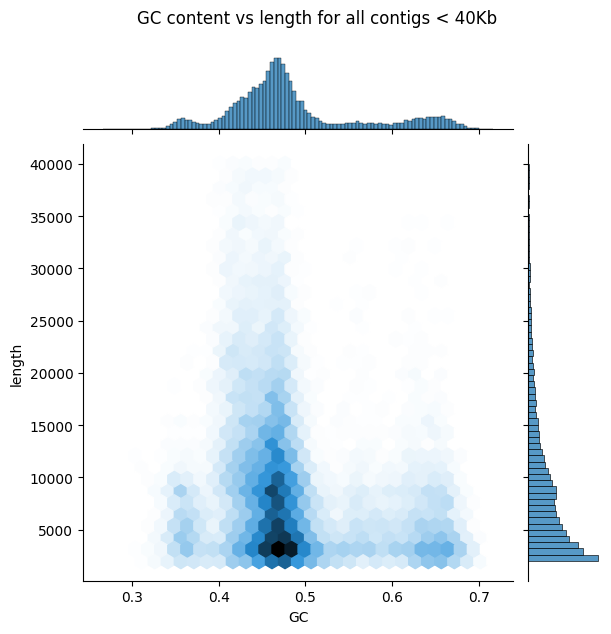

In [ ]:
# Just contigs less than 40Kb
g=sns.jointplot(
    data=con[con.length < 40000],
    x="GC",
    y="length",
    kind="hex",
    gridsize=30
)
# Set a super title for the figure
g.fig.suptitle("GC content vs length for all contigs < 40Kb", y=1.05);

## `catplot` - Categorical plot
In lecture 4 we counted the number of species in each Class of Animals using `value_counts()`. Let's make a plot to visualize these counts using seaborn's `catplot`. `catplot` takes in a long-form (tidy) dataframe for plotting. In a tidy dataframe, each column should correspond to a variable, and each row should correspond to an observation. Here we created a tidy dataframe, `animals_df`, that contains the Class name of each observation of an Animal.

In [ ]:
euk.Class[(euk.Kingdom == "Animals")].to_frame()

,Class
34,Roundworms
35,Roundworms
36,Roundworms
37,Insects
38,Insects
...,...
7783,Mammals
7784,Mammals
7789,Mammals
7790,Mammals


In [ ]:
euk.Class[(euk.Kingdom == "Animals")]

,Class
34,Roundworms
35,Roundworms
36,Roundworms
37,Insects
38,Insects
...,...
7783,Mammals
7784,Mammals
7789,Mammals
7790,Mammals


In [ ]:
# use to_frame() to convert a Series to a Dataframe
animals_df = euk.Class[(euk.Kingdom == "Animals")].to_frame()
animals_df.columns = ['Animals']
animals_df

,Animals
34,Roundworms
35,Roundworms
36,Roundworms
37,Insects
38,Insects
...,...
7783,Mammals
7784,Mammals
7789,Mammals
7790,Mammals


There are many kinds of catplot. Here we are setting `x='Animals'` and `kind='count'` because we are plotting barplot that represents the counts of each unique obersvation (counts of unique types of Animals).

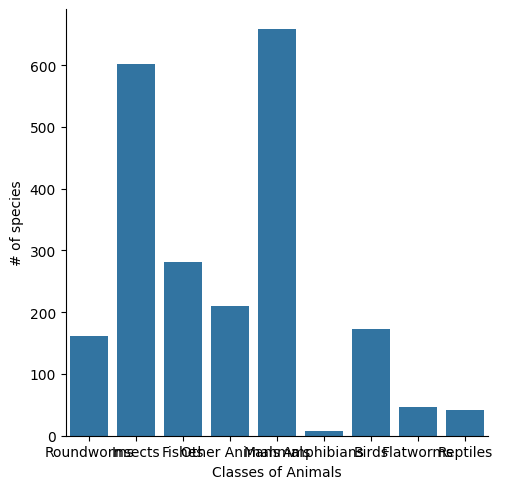

In [ ]:
sns.catplot(
    x='Animals',
    data=animals_df,
    kind='count'
).set_axis_labels('Classes of Animals', '# of species');

We can improve the plot by ordering the bars based on the height, and also swap the x and y axis to avoid having overlapping data along the x-axis. We don't really need different colors for each bar in this plot since the bars are already labeled. We will set the `color` to 'darkblue'.

In [ ]:
animals_df['Animals'].value_counts()

,count
Animals,
Mammals,658
Insects,602
Fishes,282
Other Animals,210
Birds,172
Roundworms,162
Flatworms,47
Reptiles,41
Amphibians,7


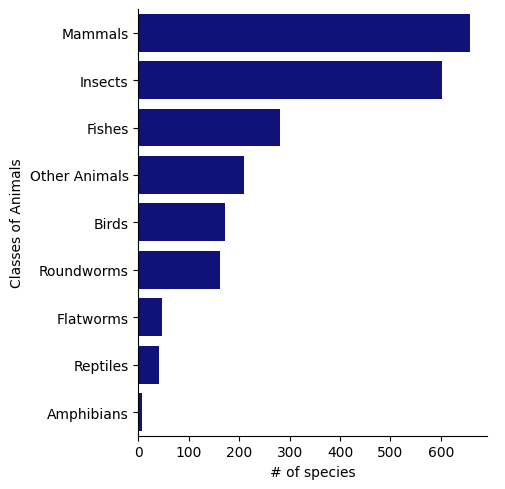

In [ ]:
sns.catplot(
    y="Animals",
    data=animals_df,
    kind='count',
    order=animals_df['Animals'].value_counts().index,
    color='darkblue'
).set_axis_labels('# of species', 'Classes of Animals');

Let's take a closer look at the `order` argument. We use `value_counts()` to get the counts of each unique Animals. The resulting Series output by `value_counts()` is already sorted. Simply add `.index` to get the index of each Class of Animals in the sorted order.

In [ ]:
animals_df['Animals'].value_counts().index

Index(['Mammals', 'Insects', 'Fishes', 'Other Animals', 'Birds', 'Roundworms',
       'Flatworms', 'Reptiles', 'Amphibians'],
      dtype='string', name='Animals')

## Rotating the x-axis labels
Another way to display the axis labels is to rotate them so that they don't overlap with each other using `set_xticklabels`.

In [ ]:
animals_df

,Animals
34,Roundworms
35,Roundworms
36,Roundworms
37,Insects
38,Insects
...,...
7783,Mammals
7784,Mammals
7789,Mammals
7790,Mammals


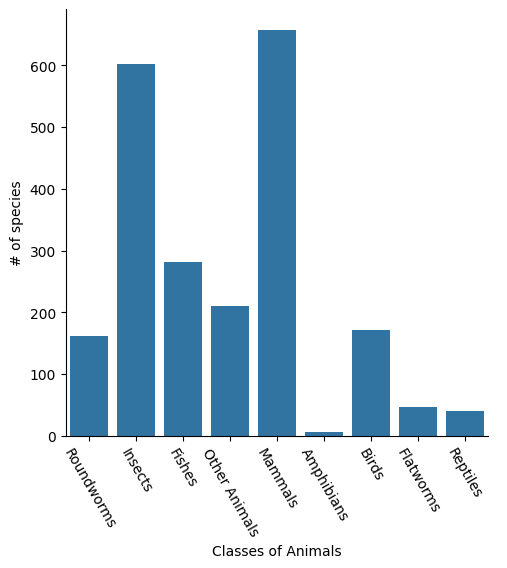

In [ ]:
g = sns.catplot(
    x='Animals',
    data=animals_df,
    kind='count'
)
g.set_axis_labels('Classes of Animals', '# of species')
g.set_xticklabels(rotation=300);

## Your turn

Modify the plot above to display the barplot where the classes of animals are displayed in alphabetical order.

In [ ]:
animals_df

,Animals
34,Roundworms
35,Roundworms
36,Roundworms
37,Insects
38,Insects
...,...
7783,Mammals
7784,Mammals
7789,Mammals
7790,Mammals


In [ ]:
# Your code here

